

*By Bisma Azeem*




# G2M EDA and Hypothesis testing for cab investment firm
### Importing libraries

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Importing Datasets

In [77]:
transaction_data=pd.read_csv('/content/Transaction_ID.csv')
transaction_data

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [78]:
cust_data=pd.read_csv('/content/Customer_ID.csv')
cust_data

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [79]:
city_data=pd.read_csv('/content/City.csv')
city_data

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [80]:
cab_data=pd.read_csv('/content/Cab_Data.csv')
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,02-01-2016,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,07-01-2016,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,03-01-2016,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,08-01-2018,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,04-01-2018,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,05-01-2018,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,05-01-2018,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [81]:
holiday_data=pd.read_csv('/content/US Holiday Dates (2004-2021).csv')
holiday_data

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008
...,...,...,...,...,...,...
337,2006-04-16,Western Easter,Sunday,4,16,2006
338,2017-04-16,Western Easter,Sunday,4,16,2017
339,2014-04-20,Western Easter,Sunday,4,20,2014
340,2019-04-21,Western Easter,Sunday,4,21,2019


## Understanding the datasets

In [82]:
transaction_data.isna().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

In [83]:
city_data.isna().sum()

City          0
Population    0
Users         0
dtype: int64

In [84]:
cab_data.isna().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [85]:
cust_data.isna().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

In [86]:
holiday_data.isna().sum()

Date       0
Holiday    0
WeekDay    0
Month      0
Day        0
Year       0
dtype: int64

In [87]:
transaction_data.duplicated().sum()

0

In [88]:
cust_data.duplicated().sum()

0

In [89]:
city_data.duplicated().sum()

0

In [90]:
cab_data.duplicated().sum()

0

In [91]:
holiday_data.duplicated().sum()

0

In [92]:
transaction_data['Payment_Mode'].unique()

array(['Card', 'Cash'], dtype=object)

In [93]:
cust_data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [94]:
negative_incomes = cust_data[cust_data['Income (USD/Month)'] < 0]
if negative_incomes.empty:
  print("There are no negative values in 'Income (USD/Month)'")
else:
  print(negative_incomes)

There are no negative values in 'Income (USD/Month)'


In [95]:
columns_to_check = ['KM Travelled', 'Price Charged', 'Cost of Trip']
negative_values = []

for col in columns_to_check:
  negative_values_in_col = cab_data[cab_data[col] < 0]
  if not negative_values_in_col.empty:
    negative_values.append((col, negative_values_in_col))

if not negative_values:
  print("There are no negative values in", columns_to_check)
else:
  print("Negative values found in:")
  for col, data in negative_values:
    print(f"\t- {col}:")
    print(data)

There are no negative values in ['KM Travelled', 'Price Charged', 'Cost of Trip']


In [96]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [97]:
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [98]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [99]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [100]:
holiday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     342 non-null    object
 1   Holiday  342 non-null    object
 2   WeekDay  342 non-null    object
 3   Month    342 non-null    int64 
 4   Day      342 non-null    int64 
 5   Year     342 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 16.2+ KB


In [101]:
transaction_data.describe()

,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000


In [102]:
cust_data.describe()

,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000


In [103]:
city_data.describe()

,City,Population,Users
count,20,20,20
unique,20,20,20
top,NEW YORK NY,"8,405,837","302,149"
freq,1,1,1


In [104]:
cab_data.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993661
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.683200
max,1.044011e+07,48.000000,2048.030000,691.200000


In [105]:
holiday_data.describe()

,Month,Day,Year
count,342.000000,342.000000,342.000000
mean,7.263158,15.853801,2012.500000
std,3.899889,9.653330,5.195729
min,1.000000,1.000000,2004.000000
25%,4.000000,6.000000,2008.000000
50%,9.000000,16.500000,2012.500000
75%,11.000000,24.000000,2017.000000
max,12.000000,31.000000,2021.000000


Merging datasets for create Master Data

In [106]:
joined_customer_data = transaction_data.merge(cust_data, on='Customer ID', how='inner', indicator=True)

missing_in_trn = joined_customer_data[joined_customer_data['_merge'] == 'left_only']['Transaction ID'].count()
missing_in_cust = joined_customer_data[joined_customer_data['_merge'] == 'right_only']['Customer ID'].count()

if missing_in_trn == 0 and missing_in_cust == 0:
  print("All rows have counterparts in both DataFrames.")
else:
  print(f"{missing_in_trn} rows in 'trn_data' are missing counterparts in 'cust_data'.")
  print(f"{missing_in_cust} rows in 'cust_data' are missing counterparts in 'trn_data'.")

All rows have counterparts in both DataFrames.


In [107]:
joined_customer_data

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),_merge
0,10000011,29290,Card,Male,28,10813,both
1,10351127,29290,Cash,Male,28,10813,both
2,10412921,29290,Card,Male,28,10813,both
3,10000012,27703,Card,Male,27,9237,both
4,10320494,27703,Card,Male,27,9237,both
...,...,...,...,...,...,...,...
440093,10439799,12490,Cash,Male,33,18713,both
440094,10439820,14971,Card,Male,30,15346,both
440095,10439838,41414,Card,Male,38,3960,both
440096,10439840,41677,Cash,Male,23,19454,both


In [108]:
joined_customer_data.isnull().sum()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
_merge                0
dtype: int64

In [109]:
print(cab_data.columns)
print(city_data.columns)
print(cust_data.columns)
print(transaction_data.columns)
print(holiday_data.columns)

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')
Index(['City', 'Population', 'Users'], dtype='object')
Index(['Customer ID', 'Gender', 'Age', 'Income (USD/Month)'], dtype='object')
Index(['Transaction ID', 'Customer ID', 'Payment_Mode'], dtype='object')
Index(['Date', 'Holiday', 'WeekDay', 'Month', 'Day', 'Year'], dtype='object')


In [110]:
complete_data = joined_customer_data.merge(cab_data, on='Transaction ID', how='inner', indicator='merge_flag')

missing_in_complete = complete_data[complete_data['merge_flag'] == 'left_only']['Transaction ID'].count()
missing_in_cab = complete_data[complete_data['merge_flag'] == 'right_only']['Transaction ID'].count()

if missing_in_complete == 0 and missing_in_cab == 0:
  print("All rows have counterparts in both DataFrames.")
else:
  print(f"{missing_in_complete} rows in 'trn_data' are missing counterparts in 'cust_data'.")
  print(f"{missing_in_cab} rows in 'cust_data' are missing counterparts in 'trn_data'.")

All rows have counterparts in both DataFrames.


In [111]:
complete_data

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),_merge,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,merge_flag
0,10000011,29290,Card,Male,28,10813,both,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,both
1,10351127,29290,Cash,Male,28,10813,both,21-07-2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228,both
2,10412921,29290,Card,Male,28,10813,both,23-11-2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020,both
3,10000012,27703,Card,Male,27,9237,both,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,both
4,10320494,27703,Card,Male,27,9237,both,21-04-2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,Female,42,19417,both,07-01-2018,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144,both
359388,10439799,12490,Cash,Male,33,18713,both,03-01-2018,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720,both
359389,10439838,41414,Card,Male,38,3960,both,04-01-2018,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600,both
359390,10439840,41677,Cash,Male,23,19454,both,06-01-2018,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600,both


In [112]:
master_data=complete_data.drop(columns=['_merge','merge_flag'])

In [113]:
master_data

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,29290,Card,Male,28,10813,08-01-2016,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10351127,29290,Cash,Male,28,10813,21-07-2018,Yellow Cab,ATLANTA GA,26.19,598.70,317.4228
2,10412921,29290,Card,Male,28,10813,23-11-2018,Yellow Cab,ATLANTA GA,42.55,792.05,597.4020
3,10000012,27703,Card,Male,27,9237,06-01-2016,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
4,10320494,27703,Card,Male,27,9237,21-04-2018,Yellow Cab,ATLANTA GA,36.38,721.10,467.1192
...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10439790,38520,Card,Female,42,19417,07-01-2018,Yellow Cab,SEATTLE WA,16.66,261.18,213.9144
359388,10439799,12490,Cash,Male,33,18713,03-01-2018,Yellow Cab,SILICON VALLEY,13.72,277.97,172.8720
359389,10439838,41414,Card,Male,38,3960,04-01-2018,Yellow Cab,TUCSON AZ,19.00,303.77,232.5600
359390,10439840,41677,Cash,Male,23,19454,06-01-2018,Yellow Cab,TUCSON AZ,5.60,92.42,70.5600


In [114]:
master_data.isnull().sum()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
dtype: int64

In [115]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Transaction ID      359392 non-null  int64  
 1   Customer ID         359392 non-null  int64  
 2   Payment_Mode        359392 non-null  object 
 3   Gender              359392 non-null  object 
 4   Age                 359392 non-null  int64  
 5   Income (USD/Month)  359392 non-null  int64  
 6   Date of Travel      359392 non-null  object 
 7   Company             359392 non-null  object 
 8   City                359392 non-null  object 
 9   KM Travelled        359392 non-null  float64
 10  Price Charged       359392 non-null  float64
 11  Cost of Trip        359392 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 32.9+ MB


In [116]:
master_data['Date of Travel'] = pd.to_datetime(master_data['Date of Travel'], format='%d-%m-%Y')

In [117]:
holiday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     342 non-null    object
 1   Holiday  342 non-null    object
 2   WeekDay  342 non-null    object
 3   Month    342 non-null    int64 
 4   Day      342 non-null    int64 
 5   Year     342 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 16.2+ KB


In [118]:
holiday_data.head()

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


In [120]:
holiday_data['Date'] = pd.to_datetime(holiday_data['Date'], format='%Y-%m-%d')

In [129]:
holiday_data['Date'] = holiday_data['Date'].dt.strftime('%d-%m-%Y')

In [144]:
holiday_data['Year'].unique()

array([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [131]:
holiday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     342 non-null    object
 1   Holiday  342 non-null    object
 2   WeekDay  342 non-null    object
 3   Month    342 non-null    int64 
 4   Day      342 non-null    int64 
 5   Year     342 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 16.2+ KB


In [133]:
holiday_data['Date'] = pd.to_datetime(holiday_data['Date'], format='%d-%m-%Y')

In [135]:
holiday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     342 non-null    datetime64[ns]
 1   Holiday  342 non-null    object        
 2   WeekDay  342 non-null    object        
 3   Month    342 non-null    int64         
 4   Day      342 non-null    int64         
 5   Year     342 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 16.2+ KB


In [136]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Customer ID         359392 non-null  int64         
 2   Payment_Mode        359392 non-null  object        
 3   Gender              359392 non-null  object        
 4   Age                 359392 non-null  int64         
 5   Income (USD/Month)  359392 non-null  int64         
 6   Date of Travel      359392 non-null  datetime64[ns]
 7   Company             359392 non-null  object        
 8   City                359392 non-null  object        
 9   KM Travelled        359392 non-null  float64       
 10  Price Charged       359392 non-null  float64       
 11  Cost of Trip        359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 32.9+ MB


In [137]:
master_data = master_data.rename(columns={'Date of Travel': 'Date'})  # Replace 'Travel_Date' with the actual column name in your data



In [138]:
print(master_data['Date'].dtype)
print(holiday_data['Date'].dtype)

datetime64[ns]
datetime64[ns]


In [162]:
holiday_data.tail()

,Date,Holiday,WeekDay,Month,Day,Year
337,2006-04-16,Western Easter,Sunday,4,16,2006
338,2017-04-16,Western Easter,Sunday,4,16,2017
339,2014-04-20,Western Easter,Sunday,4,20,2014
340,2019-04-21,Western Easter,Sunday,4,21,2019
341,2011-04-24,Western Easter,Sunday,4,24,2011


In [157]:
merged_data = pd.merge(master_data, holiday_data, how='inner', left_on='Date', right_on='Date')


In [163]:
merged_data['Date'].unique()

<DatetimeArray>
['2016-09-04 00:00:00', '2016-12-31 00:00:00', '2017-09-03 00:00:00',
 '2017-11-11 00:00:00', '2017-12-24 00:00:00', '2018-11-21 00:00:00',
 '2017-12-31 00:00:00', '2018-09-01 00:00:00', '2016-05-30 00:00:00',
 '2017-04-16 00:00:00', '2018-12-25 00:00:00', '2016-10-10 00:00:00',
 '2017-09-04 00:00:00', '2016-11-24 00:00:00', '2016-12-25 00:00:00',
 '2016-12-24 00:00:00', '2017-11-22 00:00:00', '2018-01-01 00:00:00',
 '2018-01-15 00:00:00', '2018-05-28 00:00:00', '2018-12-24 00:00:00',
 '2017-12-25 00:00:00', '2017-01-01 00:00:00', '2018-12-31 00:00:00',
 '2016-09-05 00:00:00', '2016-06-19 00:00:00', '2018-06-19 00:00:00',
 '2017-01-16 00:00:00', '2018-11-11 00:00:00', '2017-02-14 00:00:00',
 '2018-02-14 00:00:00', '2016-02-14 00:00:00', '2016-03-27 00:00:00',
 '2016-07-04 00:00:00', '2018-09-03 00:00:00', '2017-11-23 00:00:00',
 '2016-11-11 00:00:00', '2017-06-19 00:00:00', '2018-11-22 00:00:00',
 '2017-05-29 00:00:00', '2017-10-09 00:00:00', '2018-07-04 00:00:00',
 '20

In [158]:
merged_data.isnull().sum()

Transaction ID        0
Customer ID           0
Payment_Mode          0
Gender                0
Age                   0
Income (USD/Month)    0
Date                  0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Holiday               0
WeekDay               0
Month                 0
Day                   0
Year                  0
dtype: int64

In [170]:
master_data = merged_data.sort_values(by=['Date'], ascending=True).copy()
master_data

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date,Company,City,KM Travelled,Price Charged,Cost of Trip,Holiday,WeekDay,Month,Day,Year
19105,10004222,52362,Card,Male,50,10662,2016-01-18,Yellow Cab,WASHINGTON DC,30.74,524.14,442.6560,"Martin Luther King, Jr. Day",Monday,1,18,2016
19028,10001874,4548,Card,Male,40,21588,2016-01-18,Yellow Cab,CHICAGO IL,43.32,952.07,519.8400,"Martin Luther King, Jr. Day",Monday,1,18,2016
19029,10001915,4731,Cash,Male,28,2770,2016-01-18,Yellow Cab,CHICAGO IL,7.84,167.33,111.9552,"Martin Luther King, Jr. Day",Monday,1,18,2016
19030,10001920,5778,Card,Male,19,7032,2016-01-18,Yellow Cab,CHICAGO IL,30.74,643.11,438.9672,"Martin Luther King, Jr. Day",Monday,1,18,2016
19031,10001921,4281,Card,Male,65,6853,2016-01-18,Yellow Cab,CHICAGO IL,3.80,73.88,53.3520,"Martin Luther King, Jr. Day",Monday,1,18,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11526,10434162,58133,Card,Female,22,12560,2018-12-31,Yellow Cab,BOSTON MA,36.86,496.29,451.1664,New Year’s Eve,Monday,12,31,2018
11527,10436755,4416,Cash,Male,59,24183,2018-12-31,Pink Cab,CHICAGO IL,39.24,523.33,443.4120,New Year’s Eve,Monday,12,31,2018
11528,10434356,4173,Card,Female,30,18923,2018-12-31,Yellow Cab,CHICAGO IL,8.32,109.88,112.8192,New Year’s Eve,Monday,12,31,2018
11521,10434702,25417,Card,Female,33,9597,2018-12-31,Yellow Cab,DALLAS TX,22.88,375.32,280.0512,New Year’s Eve,Monday,12,31,2018


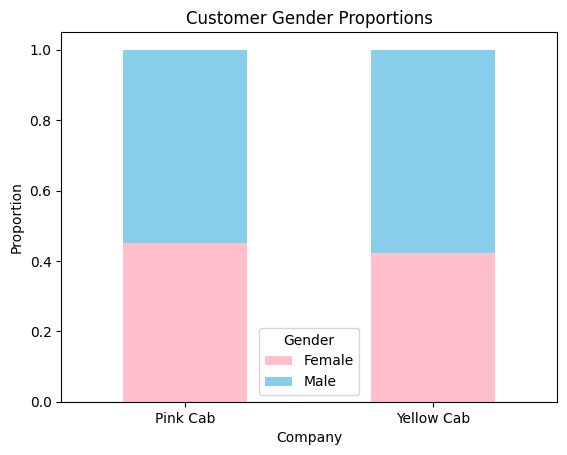

In [176]:
colors=['pink','skyblue']
pd.crosstab(index=master_data.Company, columns=master_data.Gender, normalize='index') \
    .plot(kind='bar', stacked=True, rot=0, title="Customer Gender Proportions", color=colors)
plt.xlabel("Company")
plt.ylabel("Proportion")
plt.legend(title="Gender")

Proportion of Total Card Customers: 60.27 %
Proportion of Total Cash Customers: 39.73 %


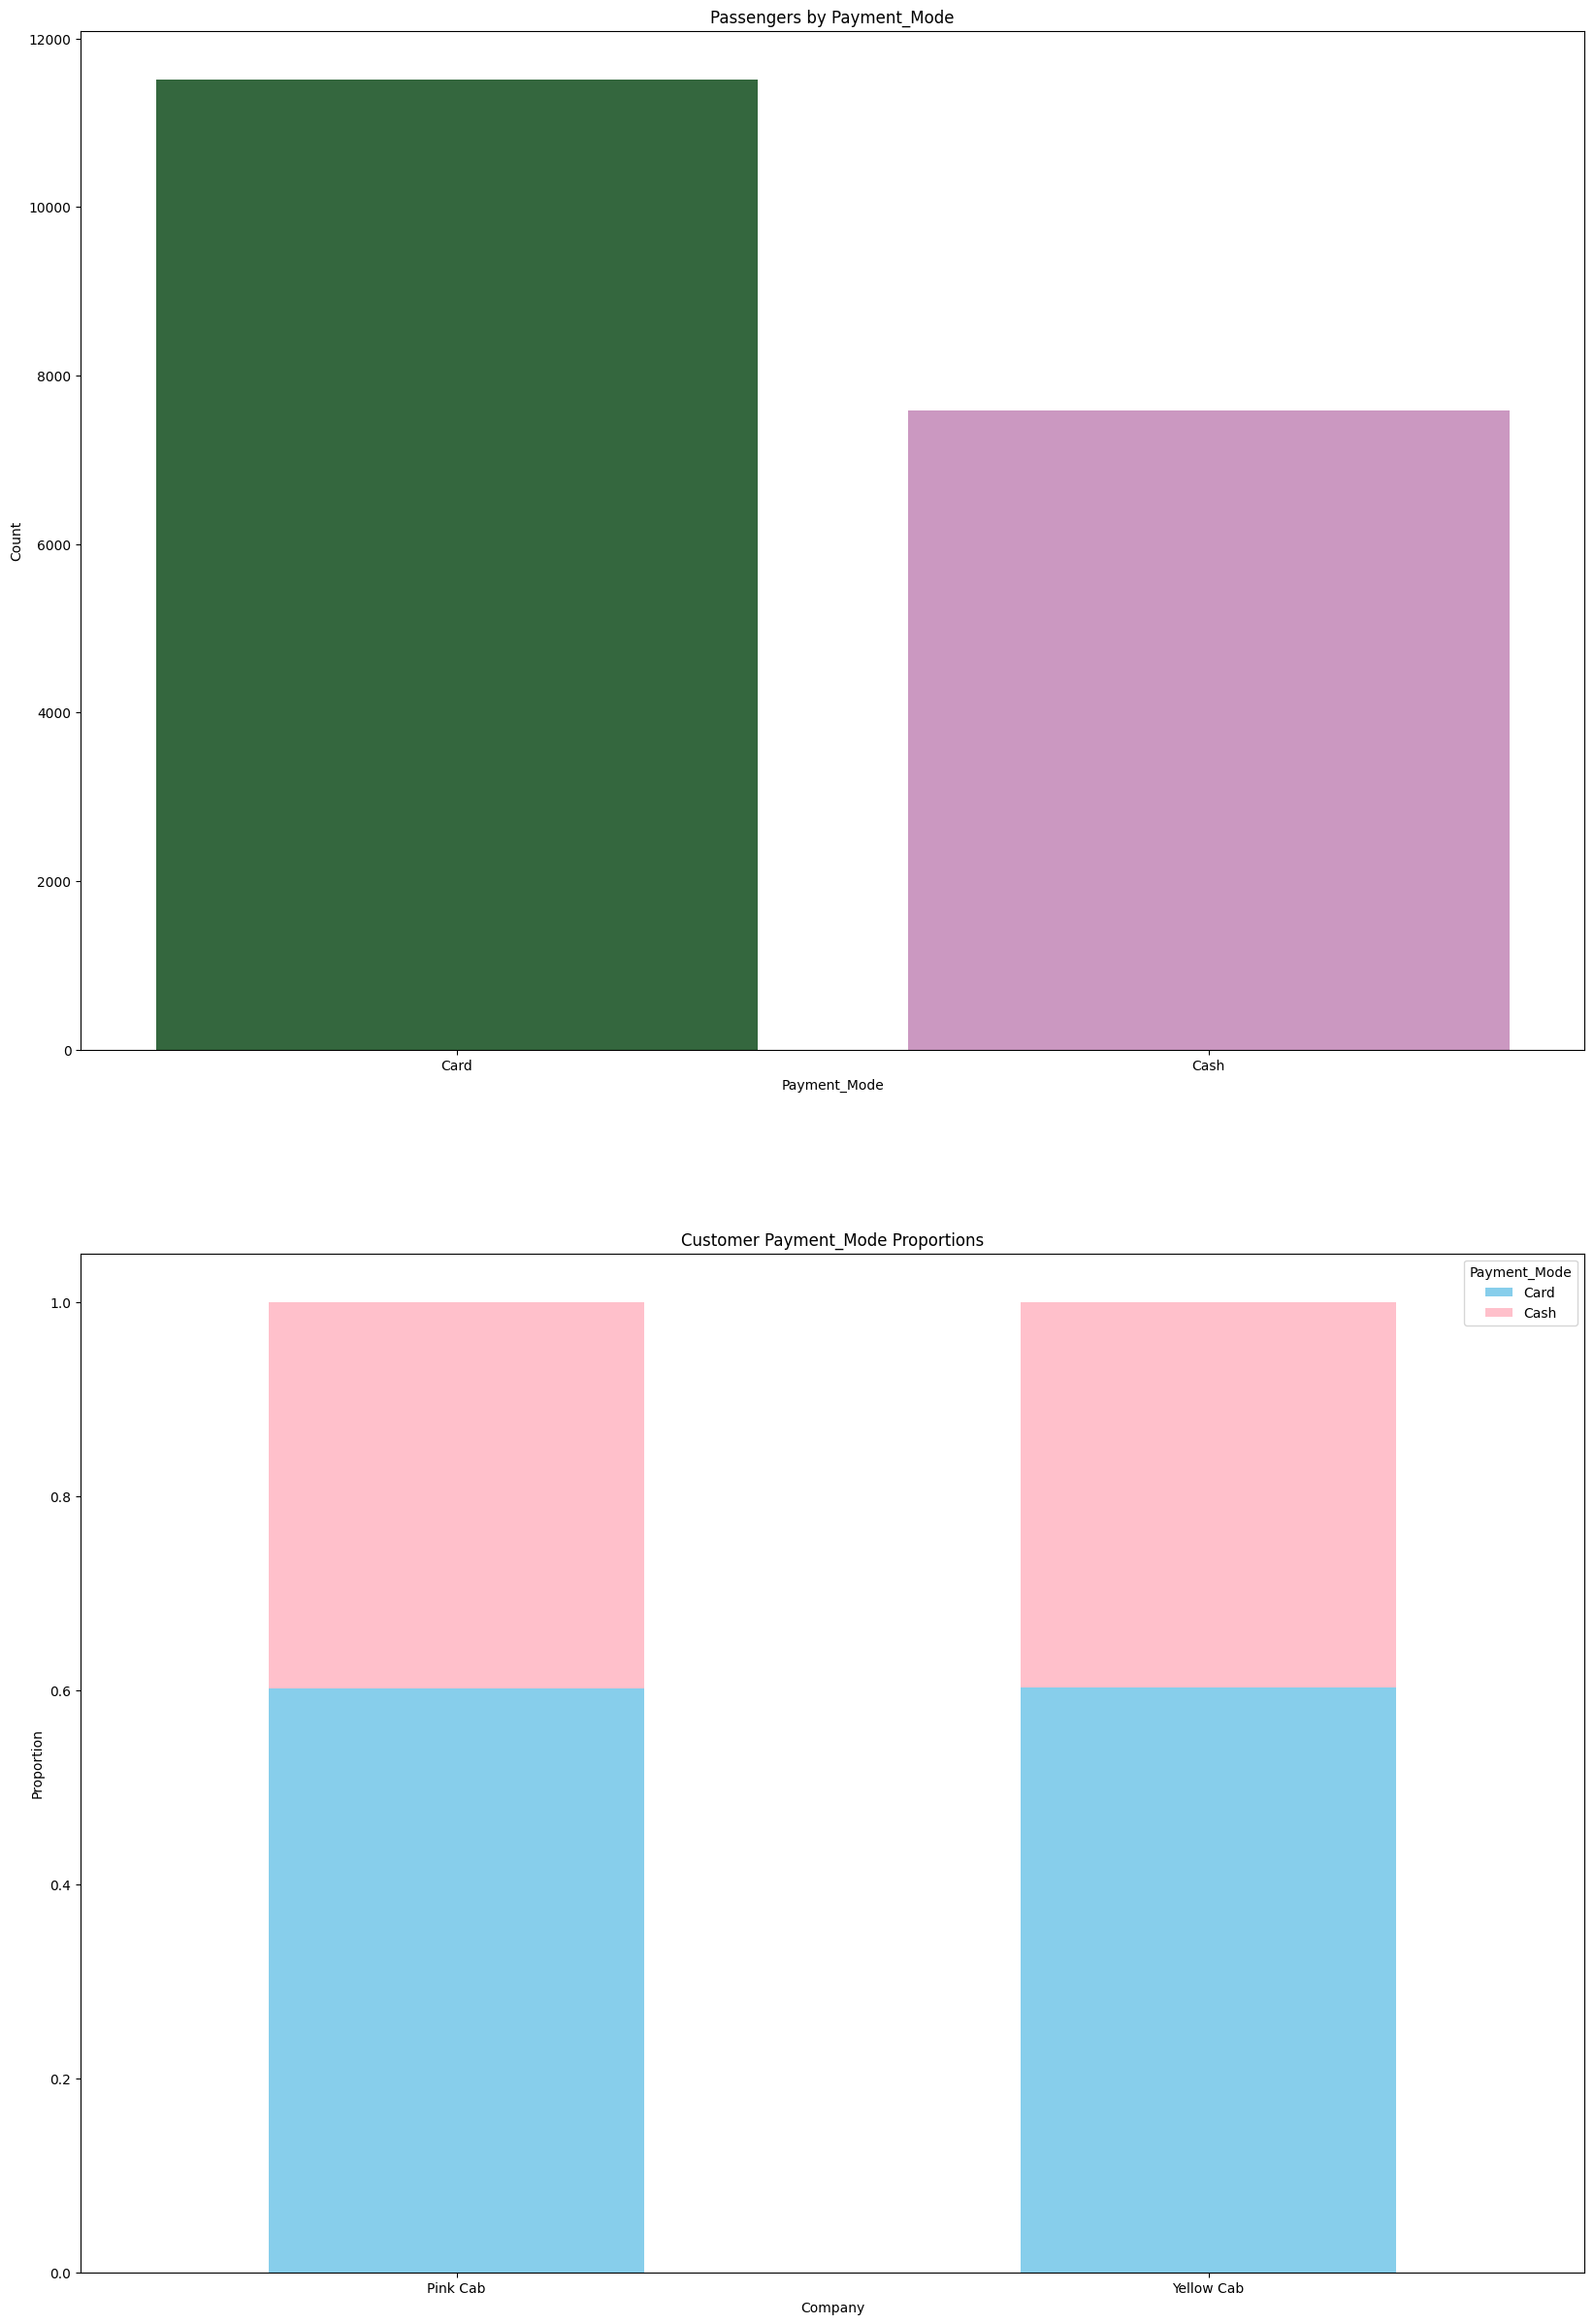

In [179]:
card_proportion = (master_data.Payment_Mode.value_counts(normalize=True)[0] * 100).round(2)
cash_proportion = (master_data.Payment_Mode.value_counts(normalize=True)[1] * 100).round(2)

print(f'Proportion of Total Card Customers: {card_proportion} %')
print(f'Proportion of Total Cash Customers: {cash_proportion} %')

fig, ax = plt.subplots(2, 1, figsize=(20, 30))
colors=['skyblue','pink']
sns.countplot(x="Payment_Mode", hue="Payment_Mode", data=master_data, ax=ax[0], palette="cubehelix").set_title("Passengers by Payment_Mode")
ax[0].set_xlabel("Payment_Mode")
ax[0].set_ylabel("Count")

pd.crosstab(index=master_data.Company, columns=master_data.Payment_Mode, normalize='index') \
    .plot(kind='bar', stacked=True, ax=ax[1], rot=0, title="Customer Payment_Mode Proportions", color=colors)
ax[1].set_xlabel("Company")
ax[1].set_ylabel("Proportion")
ax[1].legend(title="Payment_Mode")



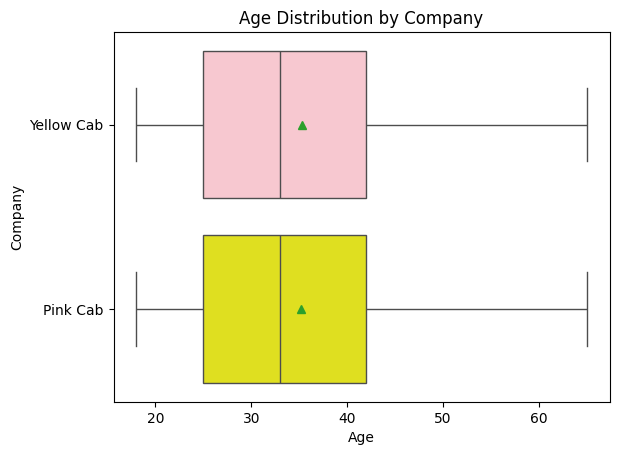

In [180]:
colors=['pink','yellow']
sns.boxplot(x="Age", y="Company",  hue="Company",  data=master_data,palette=colors, showmeans=True,ax=None).set_title("Age Distribution by Company")
plt.show()


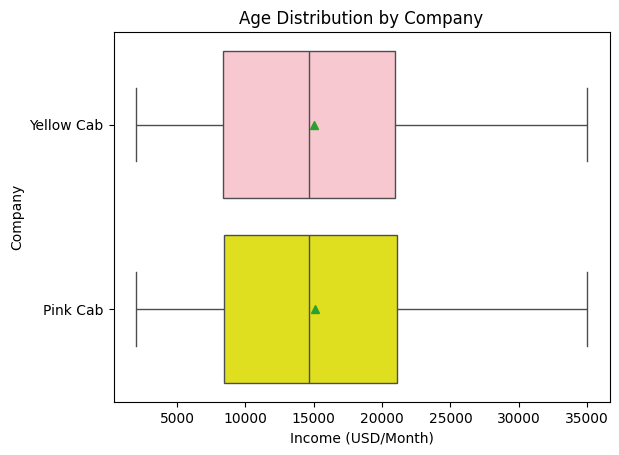

In [181]:
colors=['pink','yellow']
sns.boxplot(x="Income (USD/Month)", y="Company",  hue="Company",  data=master_data,palette=colors, showmeans=True,ax=None).set_title("Age Distribution by Company")
plt.show()

<ipython-input-182-2b08838d22c7>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(
<ipython-input-182-2b08838d22c7>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


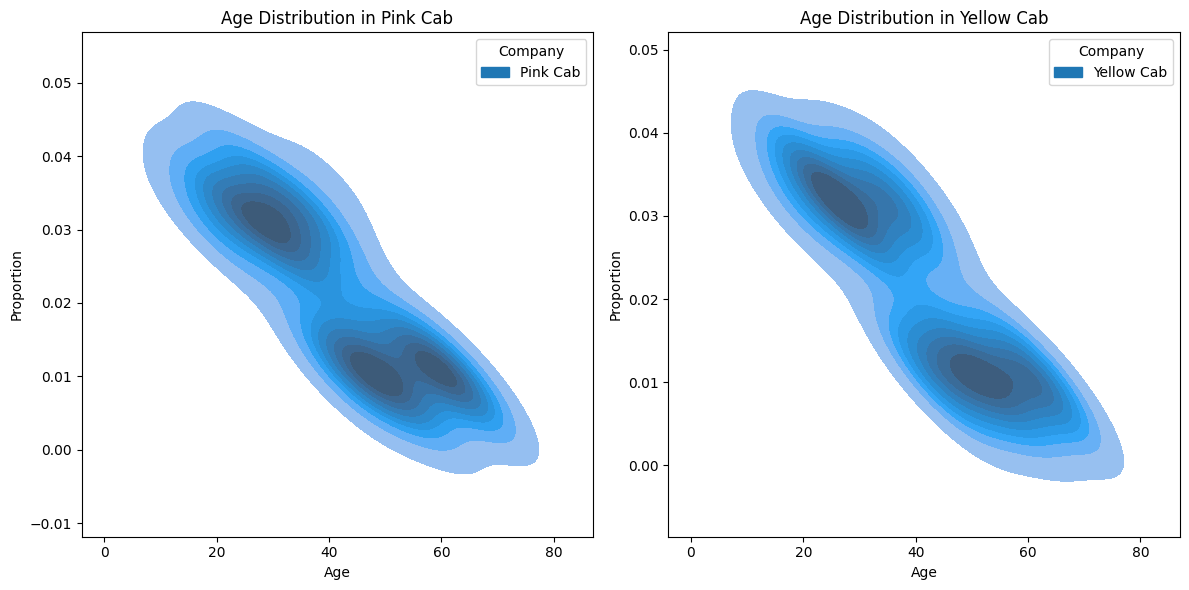

In [182]:
company_age_counts = (
    master_data.groupby("Company")["Age"]
    .value_counts(normalize=True)
    .reset_index(name="Proportion")
)


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

companies = company_age_counts["Company"].unique()
for i, company in enumerate(companies):
    company_data = company_age_counts[company_age_counts["Company"] == company]
    sns.kdeplot(
        x="Age",
        y="Proportion",
        data=company_data,
        shade=True,
        hue="Company",
        ax=axes[i],
    ).set_title(f"Age Distribution in {company}")

plt.tight_layout()
plt.show()


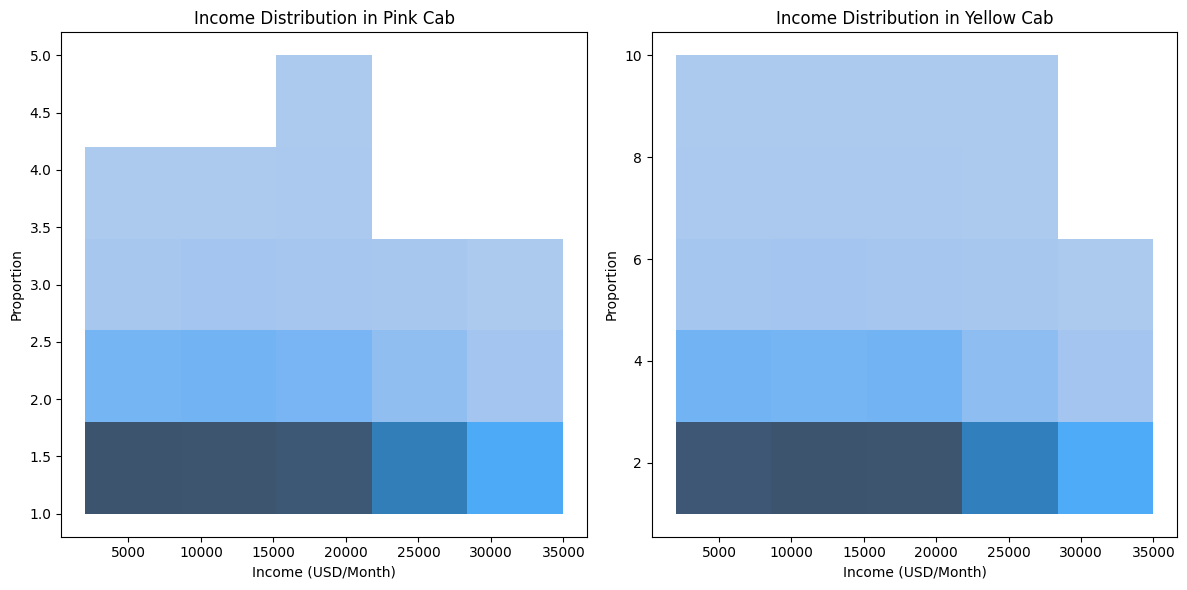

In [183]:
company_income_counts = (
    master_data.groupby("Company")["Income (USD/Month)"]
    .value_counts()
    .reset_index(name="Proportion")
)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

companies = company_income_counts["Company"].unique()
for i, company in enumerate(companies):
    company_data = company_income_counts[company_income_counts["Company"] == company]
    sns.histplot(
        x="Income (USD/Month)",
        y="Proportion",
        data=company_data,
        bins=5,
        kde= True,
        ax=axes[i],
    ).set_title(f"Income Distribution in {company}")

plt.tight_layout()
plt.show()


In [184]:
master_data['profit'] = master_data['Price Charged'] - master_data['Cost of Trip']

master_data['profit_per_Km'] = master_data['profit'] / master_data['KM Travelled']

master_data['profit_pctg'] = (master_data['profit'] / master_data['profit'].sum()) * 100

master_data['profit_pctg_per_km'] = (master_data['profit'] / master_data['KM Travelled']) * 100

<ipython-input-195-7f8746589da8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-195-7f8746589da8>:7: UserWarning: 
The palette list has fewer values (10) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(


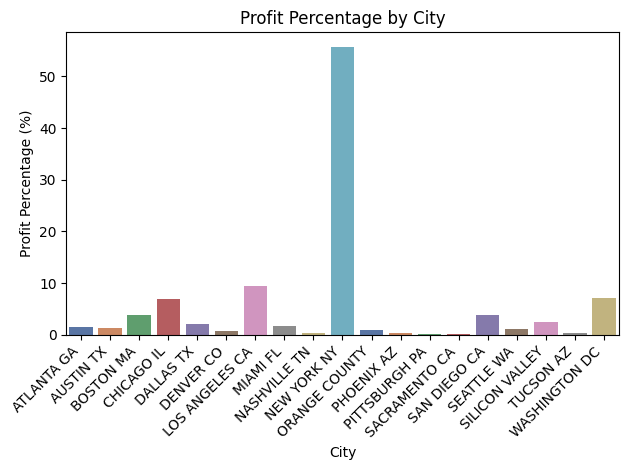

In [195]:
city_profit_pctg = (
    master_data.groupby('City')['profit'].sum() / master_data['profit'].sum() * 100
)

palette = sns.color_palette("deep")

sns.barplot(
    x=city_profit_pctg.index,
    y=city_profit_pctg.values,
    palette=palette

)

plt.xlabel("City")
plt.ylabel("Profit Percentage (%)")
plt.title("Profit Percentage by City")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

plt.show()


Until now almost in all aspects, both companies are same. Now we'll hypothesis testing to analysze them further.

**Hypothesis Testing**

1.a Calculating yearly profits of both companies

In [206]:
company_p_data = master_data[master_data['Company'] == 'Pink Cab']
company_y_data = master_data[master_data['Company'] == 'Yellow Cab']

yearly_profit_p = company_p_data.groupby(company_p_data['Date'].dt.year)['profit'].sum()
yearly_profit_y = company_y_data.groupby(company_y_data['Date'].dt.year)['profit'].sum()

years_p = yearly_profit_p.index.to_numpy()
years_y = yearly_profit_y.index.to_numpy()
profit_p = yearly_profit_p.to_numpy()
profit_y = yearly_profit_y.to_numpy()


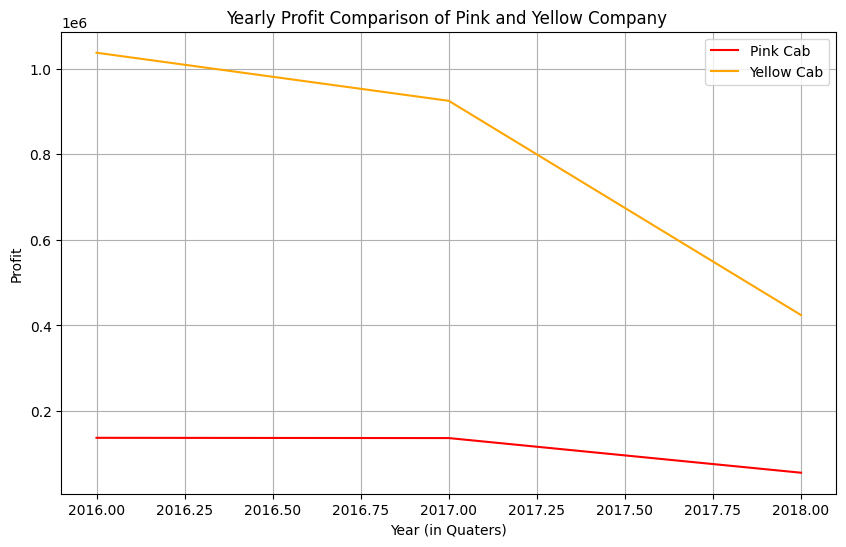

In [207]:
plt.figure(figsize=(10,6))
plt.plot(years_p, profit_p, label='Pink Cab', color='red')
plt.plot(years_y, profit_y, label='Yellow Cab', color='orange')

plt.xlabel('Year (in Quaters)')
plt.ylabel('Profit')
plt.title('Yearly Profit Comparison of Pink and Yellow Company ')
plt.legend()
plt.grid(True)
plt.show()


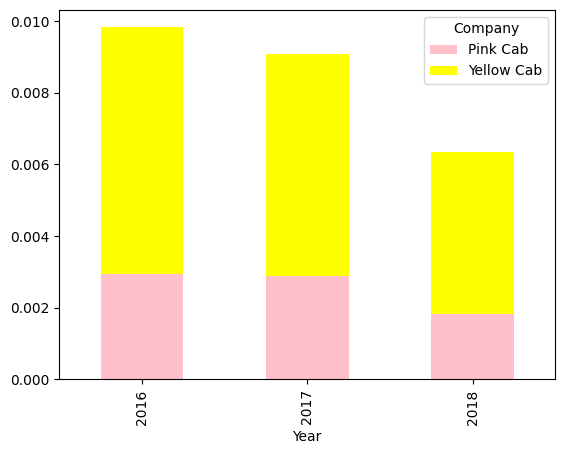

Company  Pink Cab  Yellow Cab
Year                         
2016     0.002953    0.006866
2017     0.002896    0.006194
2018     0.001837    0.004495


In [224]:
counts = master_data.groupby(['Year','Company'])['profit_pctg'].mean().unstack()
ax = counts.plot(kind='bar',stacked = True, color=colors)
plt.show()
print(counts)

**Hypothesis 1:** Yellow Cab Company is more likely to increase profit next year.

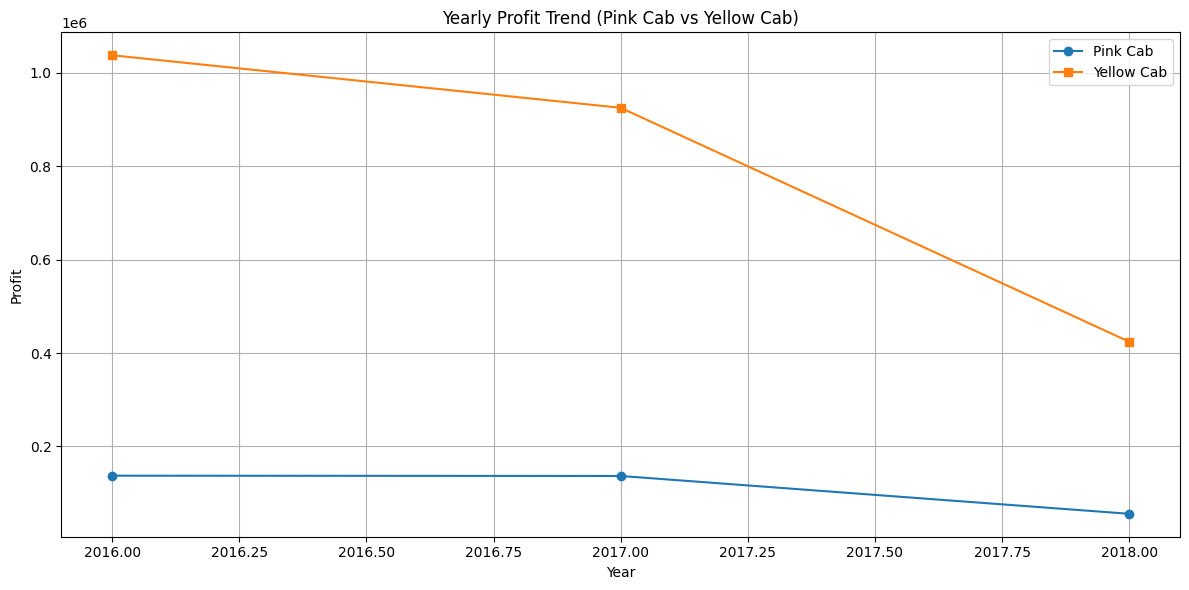

Company: Pink Cab
Profit has decreased or remained stagnant in the last year. Increased profit next year is uncertain based on this trend alone.
Company: Yellow Cab
Profit has decreased or remained stagnant in the last year. Increased profit next year is uncertain based on this trend alone.


In [232]:
total_profit_pink = company_p_data.groupby(company_p_data['Date'].dt.year)['profit'].sum()
total_profit_yellow = company_y_data.groupby(company_y_data['Date'].dt.year)['profit'].sum()

plt.figure(figsize=(12, 6))

plt.plot(total_profit_pink.index, total_profit_pink.values, marker='o', label='Pink Cab')

plt.plot(total_profit_yellow.index, total_profit_yellow.values, marker='s', label='Yellow Cab')

plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Yearly Profit Trend (Pink Cab vs Yellow Cab)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

def analyze_trend(total_profit, company_name):
  if len(total_profit) >= 2:
    last_year_profit = total_profit.iloc[-1]
    previous_year_profit = total_profit.iloc[-2]
    if last_year_profit > previous_year_profit:
      print(f"Company: {company_name}")
      print("Profit has increased in the last year. There's a possibility of further increase next year, but this cannot be guaranteed.")
    else:
      print(f"Company: {company_name}")
      print("Profit has decreased or remained stagnant in the last year. Increased profit next year is uncertain based on this trend alone.")
  else:
    print(f"Company: {company_name}")
    print("Insufficient data to analyze trend. Not enough years with profit data.")


analyze_trend(total_profit_pink, 'Pink Cab')
analyze_trend(total_profit_yellow, 'Yellow Cab')


**No, Hypothesis 1 is rejected**

2.a Calculating yearly trends of serivices for both companies

In [233]:
avg_prices_costs = master_data.groupby('Company')[['Price Charged', 'Cost of Trip']].mean()
avg_prices_costs

,Price Charged,Cost of Trip
Company,,
Pink Cab,323.345475,251.130180
Yellow Cab,462.388925,298.152139


Hypothesis 2: Yellow Cab has the highest numbers in total # of trips, total_distance, price_charged and cost_of_trip

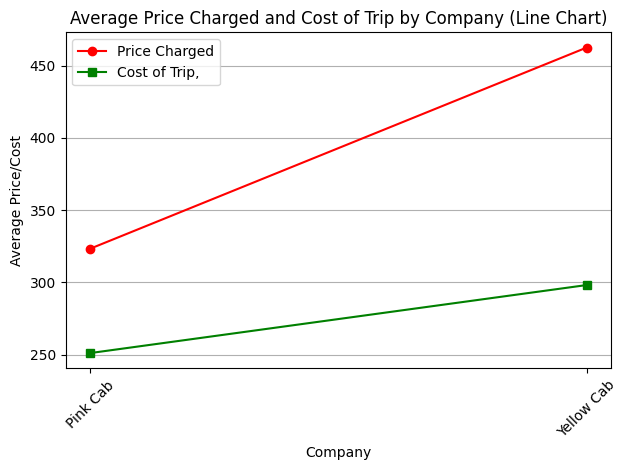

In [235]:
#Average Price Charged and Cost of Trip by Company
plt.plot(avg_prices_costs.index, avg_prices_costs['Price Charged'], marker='o', label='Price Charged',color='red')
plt.plot(avg_prices_costs.index, avg_prices_costs['Cost of Trip'], marker='s', label='Cost of Trip,', color='green')
plt.xlabel('Company')
plt.ylabel('Average Price/Cost')
plt.title('Average Price Charged and Cost of Trip by Company (Line Chart)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()

In [243]:
total_trips = master_data.groupby('Company')[['Transaction ID']].count()

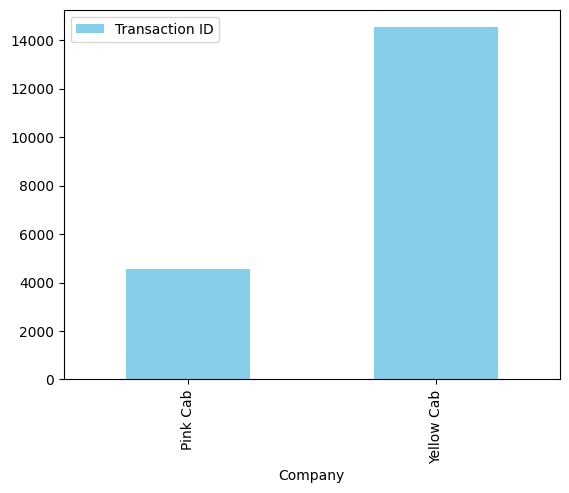

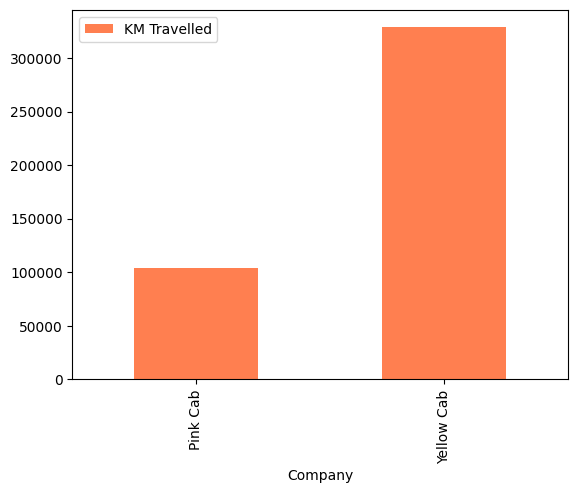

            Transaction ID
Company                   
Pink Cab              4575
Yellow Cab           14531
            KM Travelled
Company                 
Pink Cab       104328.68
Yellow Cab     328437.03


In [250]:
total_trips = master_data.groupby('Company')[['Transaction ID']].count()
total_distance = master_data.groupby('Company')[['KM Travelled']].sum()

total_trips.plot(kind='bar',stacked = True, color='skyblue')
total_distance.plot(kind='bar',stacked = True, color='coral')
plt.show()
print(total_trips)
print(total_distance)

**Hypothesis 2 accepted**

3.a Calculating Retention rate for both companines

In [262]:
master_data.columns

Index(['Transaction ID', 'Customer ID', 'Payment_Mode', 'Gender', 'Age',
       'Income (USD/Month)', 'Date', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Holiday', 'WeekDay', 'Month', 'Day',
       'Year', 'profit', 'profit_per_Km', 'profit_pctg', 'profit_pctg_per_km'],
      dtype='object')

**Hypothesis 3: ** Yellow company has higher churn rate

In [305]:
def calculate_churn_rate(data, company_name, churn_window=30):

  min_date = data['Date'].max() - pd.Timedelta(days=churn_window)

  active_customers = (
      data[data['Date'] >= min_date]
      .groupby('Customer ID')['Date']
      .max()
      .reset_index(name='last_active_date')
  )


  all_customers = data['Customer ID'].drop_duplicates().reset_index()

  churn_candidates = pd.merge(all_customers, active_customers, how='left', on='Customer ID')
  churn_candidates['churned'] = churn_candidates['last_active_date'].isnull()

  total_churn = churn_candidates[churn_candidates['churned']].shape[0]
  total_customers = churn_candidates.shape[0]
  if total_customers > 0:
    churn_rate = (total_churn / total_customers) * 100
  else:
    churn_rate = 0

  print(f"\nEstimated Churn Rate for {company_name} (based on {churn_window}-day inactivity): {churn_rate:.2f}%")

def calculate_retention_rate(data, company_name, period_start, period_end):

  active_customers_period = data[(data['Date'] >= period_start) & (data['Date'] <= period_end)]['Customer ID'].drop_duplicates().reset_index()

  all_customers = data['Customer ID'].drop_duplicates().reset_index()

  customer_status = pd.merge(all_customers, active_customers_period, how='left', on='Customer ID')
  customer_status['retained'] = customer_status['Customer ID'].notnull()

  total_retained = customer_status[customer_status['retained']].shape[0]
  total_customers = customer_status.shape[0]
  if total_customers > 0:
    retention_rate = (total_retained / total_customers) * 100
  else:
    retention_rate = 0

  print(f"\nRetention Rate for {company_name} ({period_start.strftime('%Y-%m-%d')} to {period_end.strftime('%Y-%m-%d')}): {retention_rate:.2f}%")


period_start = pd.to_datetime('2016-01-31')
period_end = pd.to_datetime('2018-12-31')

churn_window = 60

churn_rate_company_p = calculate_churn_rate(company_p_data.copy(), 'Pink Cab', churn_window)
retention_rate_company_p= calculate_retention_rate(company_p_data.copy(), 'Pink Cab', period_start, period_end)

churn_rate_company_y = calculate_churn_rate(company_y_data.copy(), 'Yellow Cab', churn_window)
retention_rate_company_y = calculate_retention_rate(company_y_data.copy(), 'Yellow Cab', period_start, period_end)



Estimated Churn Rate for Pink Cab (based on 60-day inactivity): 89.16%

Retention Rate for Pink Cab (2016-01-31 to 2018-12-31): 100.00%

Estimated Churn Rate for Yellow Cab (based on 60-day inactivity): 87.23%

Retention Rate for Yellow Cab (2016-01-31 to 2018-12-31): 100.00%


In [298]:
churn_rate_company_p = 89.16
retention_rate_company_p = 100.00
churn_rate_company_y =  87.23
retention_rate_company_y = 100.00

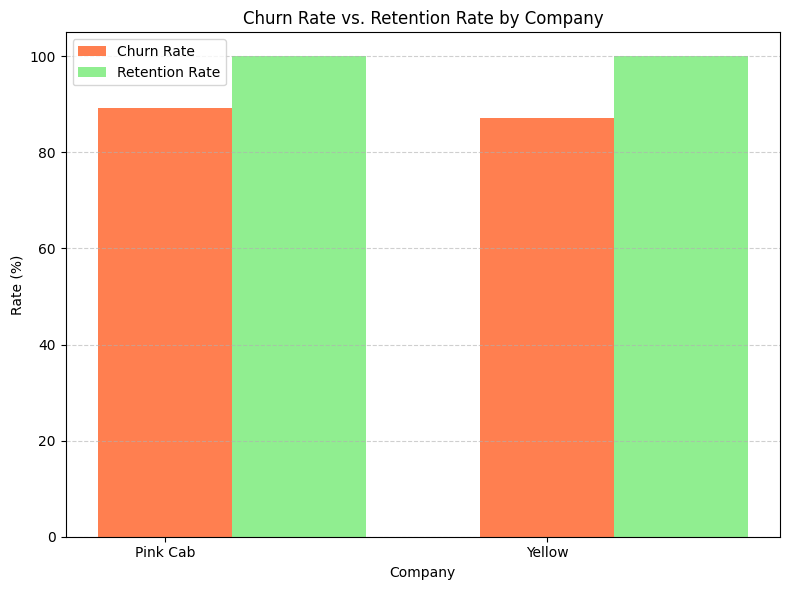

In [304]:
company_names = ['Pink Cab', 'Yellow']
churn_rates = [89.16,  87.23]
retention_rates = [100.00, 100.00]

bar_width = 0.35


plt.figure(figsize=(8, 6))
num_companies = len(company_names)
center_positions = [i + bar_width / 2 for i in range(num_companies)]


plt.bar(center_positions, churn_rates, bar_width, label='Churn Rate', color='coral')
plt.bar([p + bar_width for p in center_positions], retention_rates, bar_width, label='Retention Rate', color='lightgreen')
plt.xlabel('Company')
plt.ylabel('Rate (%)')
plt.title('Churn Rate vs. Retention Rate by Company')
plt.xticks(center_positions, company_names)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Hypothis 3 Rejected**

4.a Calculating Customer Purchase frequency

**Hypothesis 4:** Pink Cab has higher purchase frequency

<ipython-input-326-01ada76602fd>:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


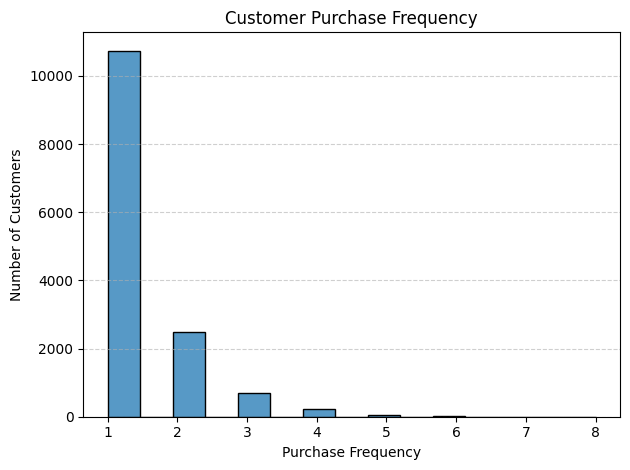

<ipython-input-326-01ada76602fd>:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


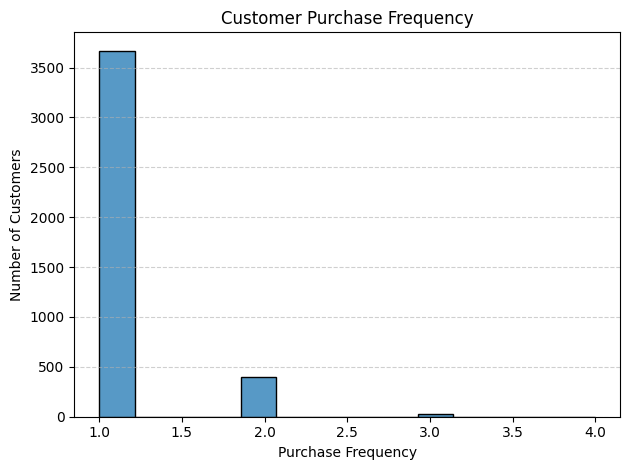

<ipython-input-326-01ada76602fd>:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(


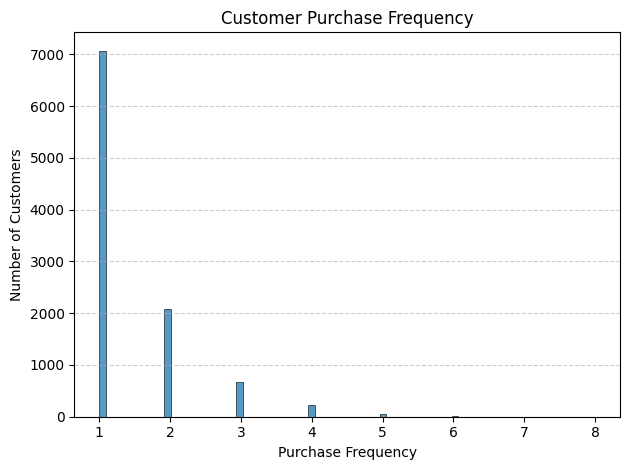

In [326]:
def calculate_purchase_frequency(data):
  """
  Calculates the purchase frequency (number of purchases) for each customer within the DataFrame.

  Args:
      data: A pandas DataFrame containing customer purchase data.

  Returns:
      A pandas DataFrame with 'Customer ID' and 'Purchase Frequency' columns.
  """
  purchase_frequency = (
      data.groupby('Customer ID')['Transaction ID'].count().reset_index(name='Purchase Frequency')
  )
  return purchase_frequency

def visualize_purchase_frequency(data, title="Customer Purchase Frequency"):
  """
  Visualizes the purchase frequency distribution for customers in the DataFrame, colored by company.

  Args:
      data: A pandas DataFrame containing 'Customer ID', 'Purchase Frequency', and 'Company' columns.
      title: The title for the visualization (optional, defaults to "Customer Purchase Frequency").
  """

  import seaborn as sns
  sns.histplot(
        x="Purchase Frequency",
        data=data,
        multiple="stack",
        stat="count",
        palette="Set2",
    )

  plt.xlabel('Purchase Frequency')
  plt.ylabel('Number of Customers')
  plt.title(title)
  plt.grid(axis='y', linestyle='--', alpha=0.6)
  plt.tight_layout()
  plt.show()


company_p_frequency = calculate_purchase_frequency(company_p_data.copy())
company_y_frequency = calculate_purchase_frequency(company_y_data.copy())


combined_data = pd.concat([company_p_frequency, company_y_frequency])

visualize_purchase_frequency(combined_data)
visualize_purchase_frequency(company_p_frequency)
visualize_purchase_frequency(company_y_frequency)


In [317]:
company_p_frequency['Purchase Frequency'].unique()

array([1, 2, 3, 4])

In [323]:
company_y_frequency['Purchase Frequency'].unique()

array([3, 1, 2, 4, 5, 6, 8, 7])

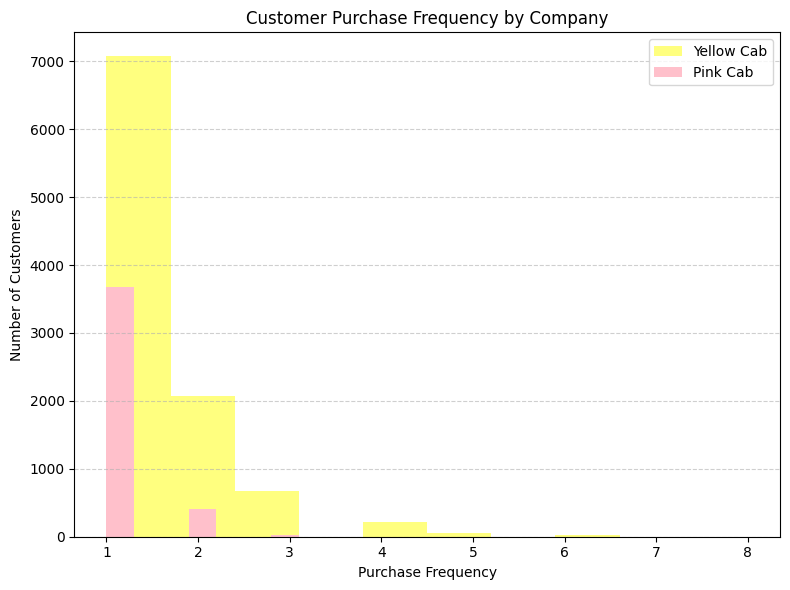

In [332]:
company_p_purchases = company_p_frequency["Purchase Frequency"]
company_y_purchases = company_y_frequency["Purchase Frequency"]
plt.figure(figsize=(8, 6))
plt.hist(company_y_purchases, label='Yellow Cab', alpha=0.5,color='yellow')
plt.hist(company_p_purchases, label='Pink Cab', alpha=1,color='pink')
plt.xlabel('Purchase Frequency')
plt.ylabel('Number of Customers')
plt.title('Customer Purchase Frequency by Company')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


**Hypothesis 4 Rejected **

In [333]:
master_data.columns

Index(['Transaction ID', 'Customer ID', 'Payment_Mode', 'Gender', 'Age',
       'Income (USD/Month)', 'Date', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip', 'Holiday', 'WeekDay', 'Month', 'Day',
       'Year', 'profit', 'profit_per_Km', 'profit_pctg', 'profit_pctg_per_km'],
      dtype='object')

**Hypthesis 5: **There's seasonality in profit

In [336]:
monthly_profit = master_data.groupby(['Year', 'Month'])['profit'].sum()
monthly_profit

Year  Month
2016  1         16543.0154
      2         98396.2666
      3         65357.1290
      5        119222.3686
      6        102003.9446
      7         17938.6236
      9        216896.2316
      10        18988.4036
      11       117719.9366
      12       401766.6644
2017  1        191190.8390
      2         49677.8018
      4        175428.6276
      5         20308.6292
      6         23231.4450
      7         16482.8176
      9        155197.1594
      10        26518.5068
      11       114057.1402
      12       289743.2862
2018  1         54974.6888
      2         31822.2792
      4         34861.9006
      5         18813.5756
      6         20087.7382
      7         11202.1746
      9        111975.3630
      10        22204.7844
      11        86589.2764
      12        87709.1012
Name: profit, dtype: float64

In [402]:
monthly_profit_avg = monthly_profit.groupby('Month').mean()
monthly_profit_avg= monthly_profit_avg.reset_index()
monthly_profit_avg

,Month,profit
0,1,87569.514400
1,2,59965.449200
2,3,65357.129000
3,4,105145.264100
4,5,52781.524467
5,6,48441.042600
6,7,15207.871933
7,9,161356.251333
8,10,22570.564933
9,11,106122.117733


<Axes: xlabel='Month', ylabel='profit'>

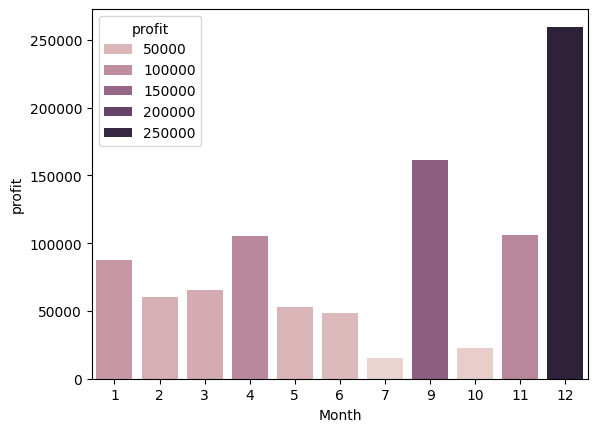

In [406]:
sns.barplot(data=monthly_profit_avg, x="Month", y="profit", hue='profit')

In [409]:
company_p_profit_annual = company_p_data.groupby('Year')['profit'].sum()
company_y_profit_annual = company_y_data.groupby('Year')['profit'].sum()

In [497]:
company_p_profit_monthly = company_p_data.groupby(['Year', 'Month'])['profit'].sum()

In [498]:
company_p_profit_monthly= company_p_profit_monthly.reset_index()

In [499]:
company_p_profit_monthly=company_p_profit_monthly.groupby('Month')['profit'].sum()

In [501]:
company_p_profit_monthly= company_p_profit_monthly.reset_index()

In [514]:
company_p_profit_monthly

,Month,profit
0,1,37033.084
1,2,11350.186
2,3,6091.077
3,4,11343.915
4,5,7185.571
5,6,7027.051
6,7,3531.231
7,9,55095.772
8,10,9749.662
9,11,48205.008


In [518]:
company_y_profit_monthly = company_y_data.groupby(['Year', 'Month'])['profit'].sum()

In [519]:
company_y_profit_monthly= company_y_profit_monthly.reset_index()

In [520]:
company_y_profit_monthly=company_y_profit_monthly.groupby('Month')['profit'].sum()

In [521]:
company_y_profit_monthly= company_y_profit_monthly.reset_index()

In [522]:
company_y_profit_monthly

,Month,profit
0,1,225675.4592
1,2,168546.1616
2,3,59266.0520
3,4,198946.6132
4,5,151159.0024
5,6,138296.0768
6,7,42092.3848
7,9,428972.9820
8,10,57962.0328
9,11,270161.3452


In [459]:
company_y_profit_annual

Year
2016    1.037321e+06
2017    9.249221e+05
2018    4.242817e+05
Name: profit, dtype: float64

In [525]:
company_p_profit_annual

Year
2016    137511.648
2017    136914.196
2018     55959.134
Name: profit, dtype: float64

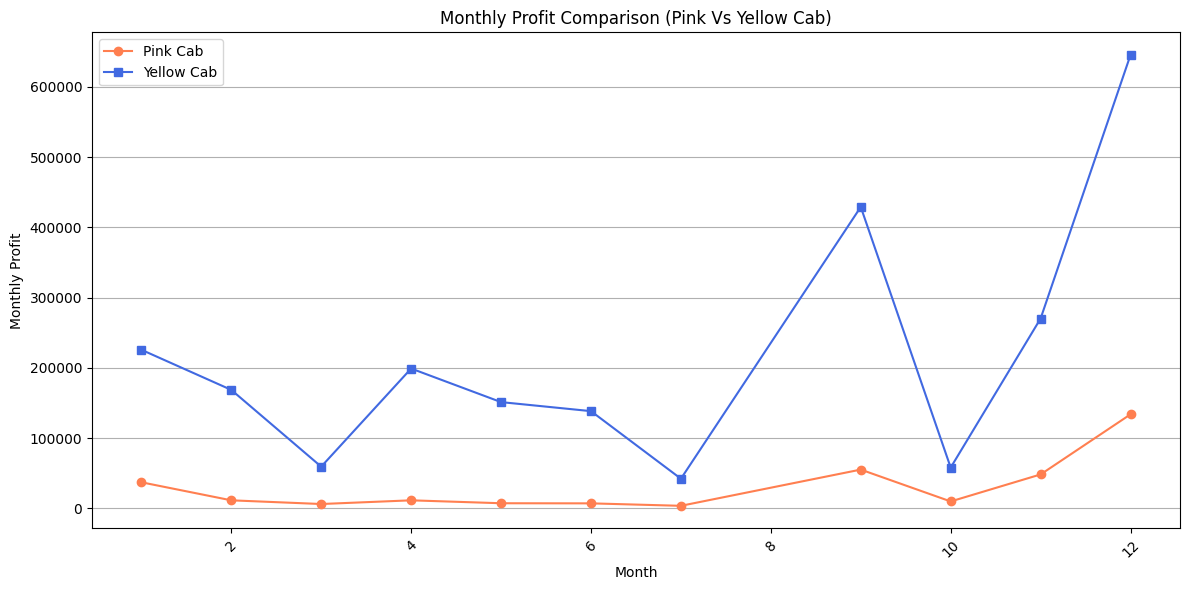

In [528]:
plt.figure(figsize=(12, 6))
plt.plot(company_p_profit_monthly['Month'], company_p_profit_monthly['profit'], label='Pink Cab', marker='o', color='coral')
plt.plot(company_y_profit_monthly['Month'], company_y_profit_monthly['profit'], label='Yellow Cab', marker='s', color='royalblue')
plt.xlabel('Month')
plt.ylabel('Monthly Profit')
plt.title('Monthly Profit Comparison (Pink Vs Yellow Cab)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()


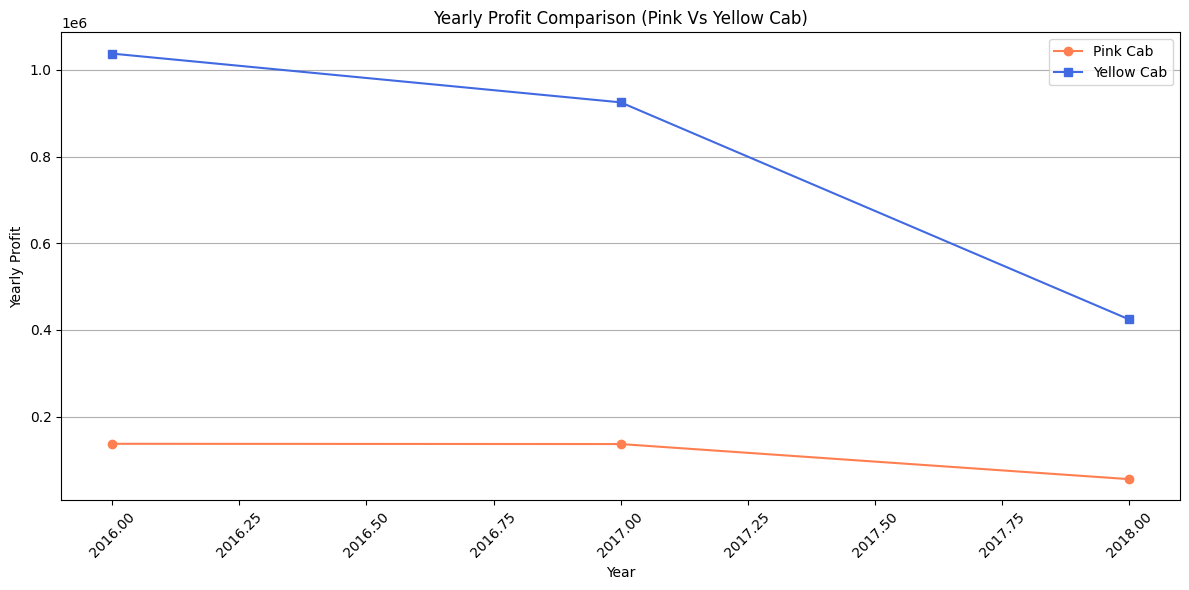

In [529]:
plt.figure(figsize=(12, 6))
plt.plot(company_p_profit_annual.index,company_p_profit_annual.values, label='Pink Cab', marker='o', color='coral')
plt.plot(company_y_profit_annual.index,company_y_profit_annual.values, label='Yellow Cab', marker='s', color='royalblue')
plt.xlabel('Year')
plt.ylabel('Yearly Profit')
plt.title('Yearly Profit Comparison (Pink Vs Yellow Cab)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.tight_layout()
plt.show()


**Hypothesis 5 Accepted: There is seasonality in profit and yellow cab tends do a lot better in those seasons**

**Hypothesis 6: ** Yellow Cab is leading in every aspect

<Axes: xlabel='profit_pctg_per_km', ylabel='Count'>

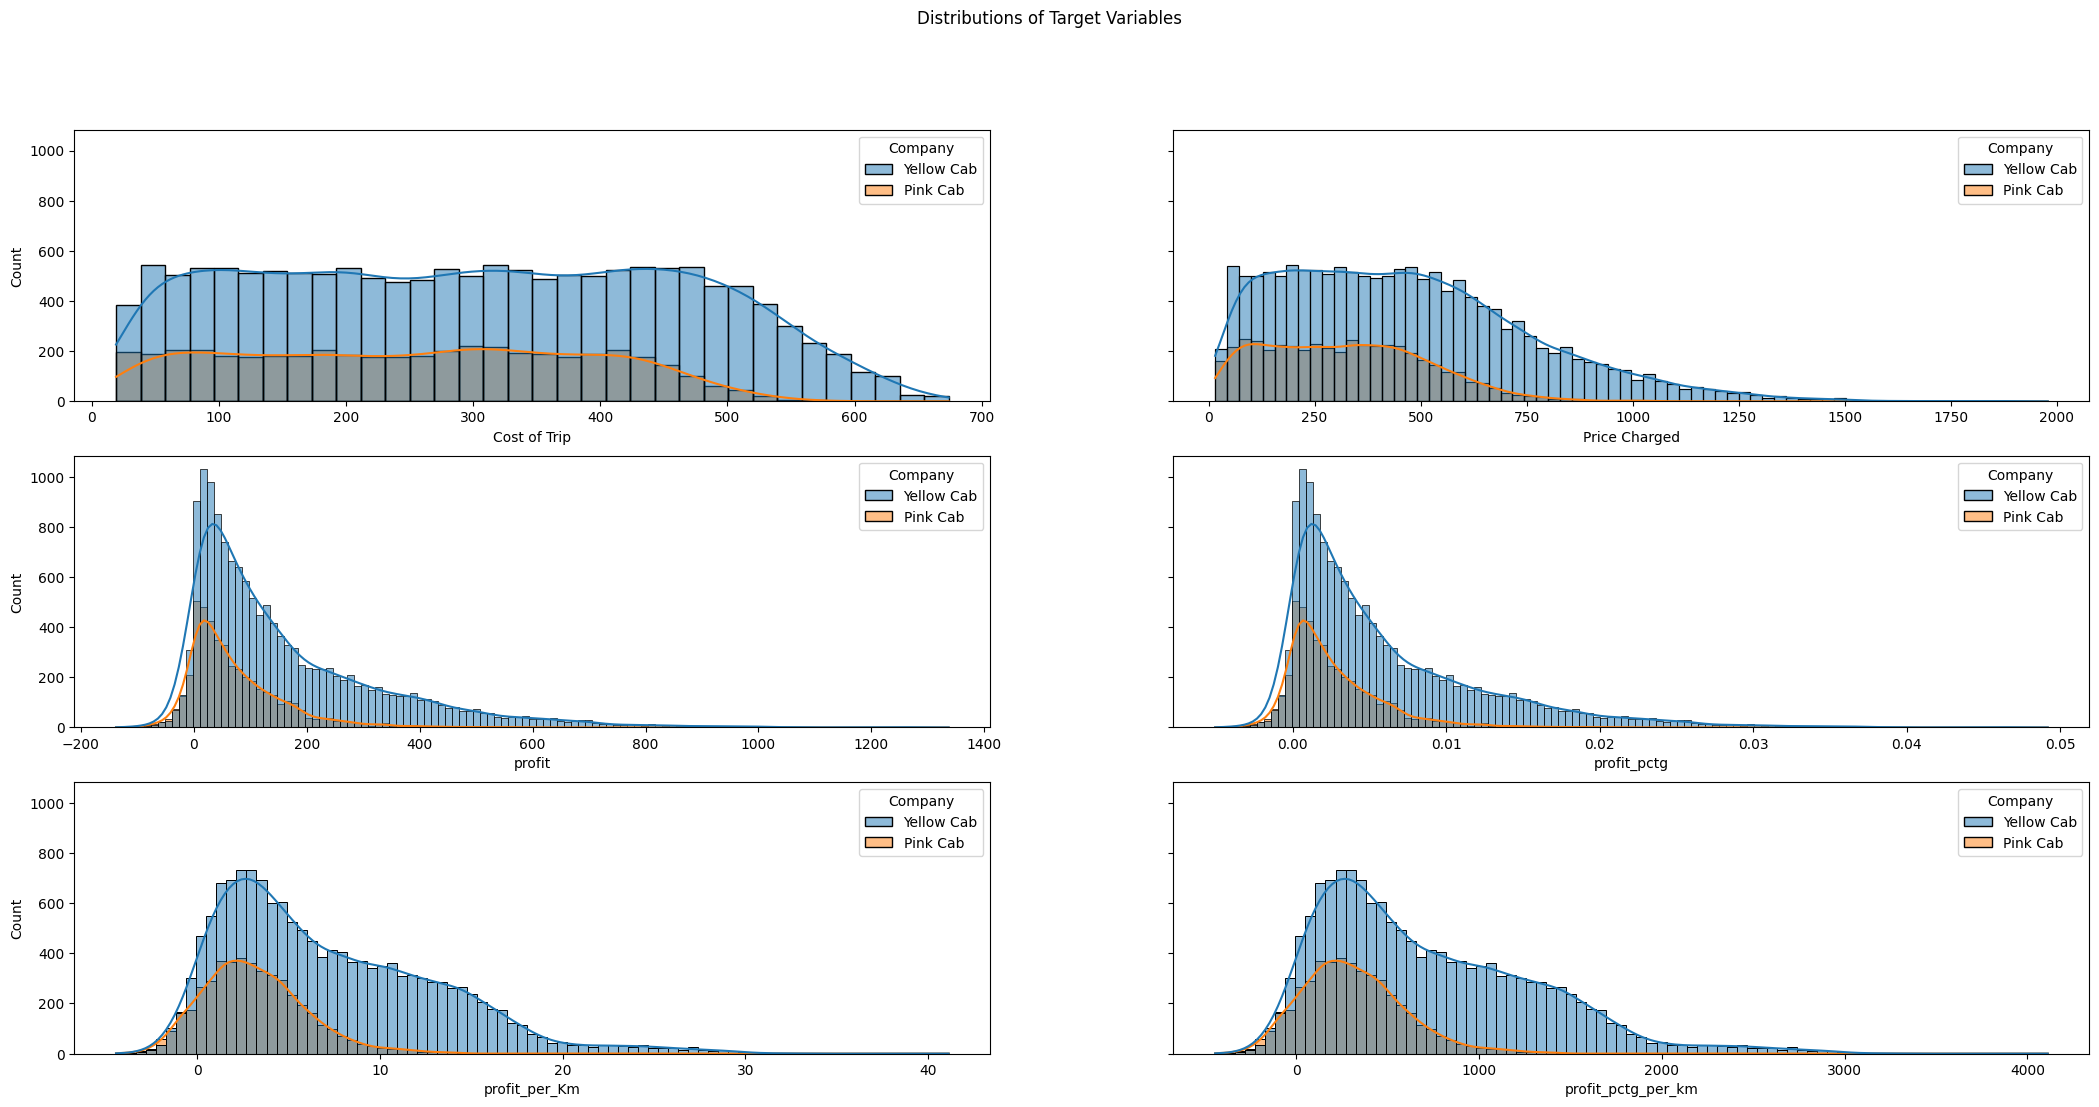

In [352]:
fig,axes = plt.subplots(3, 2 , figsize=(26,12), sharey=True)
fig.suptitle('Distributions of Target Variables')
sns.histplot(ax=axes[0,0], data=master_data , x='Cost of Trip' , kde = True , hue="Company")
sns.histplot(ax=axes[0,1], data=master_data , x='Price Charged' , kde = True , hue="Company")
sns.histplot(ax=axes[1,0], data=master_data, x='profit' , kde = True , hue="Company")
sns.histplot(ax=axes[1,1], data=master_data , x='profit_pctg' , kde = True , hue="Company")
sns.histplot(ax=axes[2,0], data=master_data , x='profit_per_Km' , kde = True , hue="Company")
sns.histplot(ax=axes[2,1], data=master_data , x='profit_pctg_per_km' , kde = True , hue="Company")

In [360]:
cab_data['profit']=cab_data['Price Charged'] - cab_data['Cost of Trip']

Text(0.5, 1.0, 'Average Daily Profit by Cab Company')

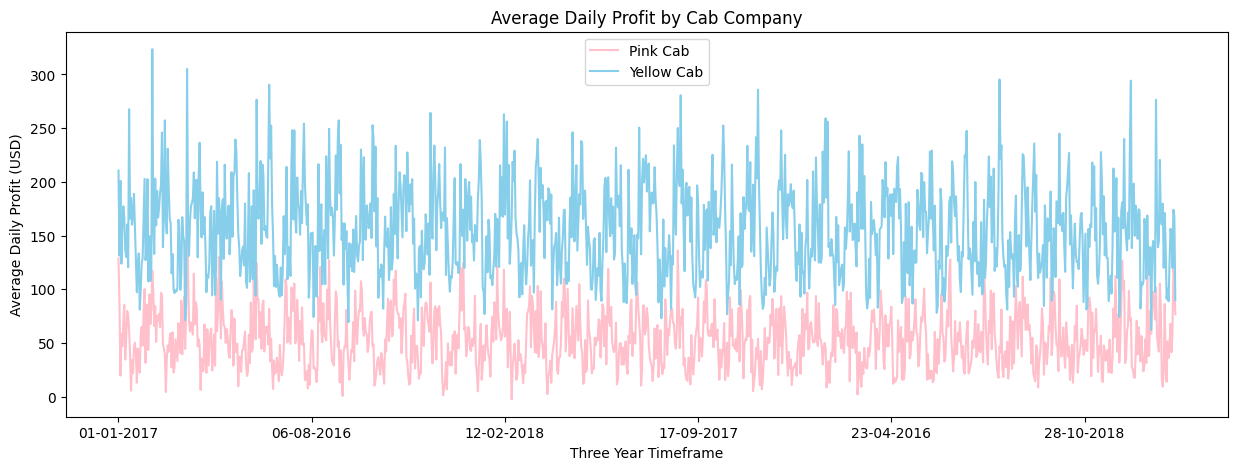

In [362]:
pink_cmp=cab_data[cab_data['Company'] =='Pink Cab']
yellow_cmp=cab_data[cab_data['Company']=='Yellow Cab']


pinkmean =pink_cmp.groupby('Date of Travel')['profit'].mean()
yellowmean =yellow_cmp.groupby('Date of Travel')['profit'].mean()

plt.subplots(1,1, figsize= (15,5))
pinkmean.plot(color = "pink")
yellowmean.plot(color = "skyblue")
plt.legend(['Pink Cab','Yellow Cab'])
plt.xlabel('Three Year Timeframe')
plt.ylabel('Average Daily Profit (USD)')
plt.title('Average Daily Profit by Cab Company')

In [367]:
pink_cmp['Date of Travel'] = pd.to_datetime(pink_cmp['Date of Travel'], format='%d-%m-%Y')
yellow_cmp['Date of Travel'] = pd.to_datetime(yellow_cmp['Date of Travel'], format='%d-%m-%Y')

<ipython-input-367-3e900f46cced>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pink_cmp['Date of Travel'] = pd.to_datetime(pink_cmp['Date of Travel'], format='%d-%m-%Y')
<ipython-input-367-3e900f46cced>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yellow_cmp['Date of Travel'] = pd.to_datetime(yellow_cmp['Date of Travel'], format='%d-%m-%Y')


Text(0.5, 1.0, 'Total Profit by Cab Company')

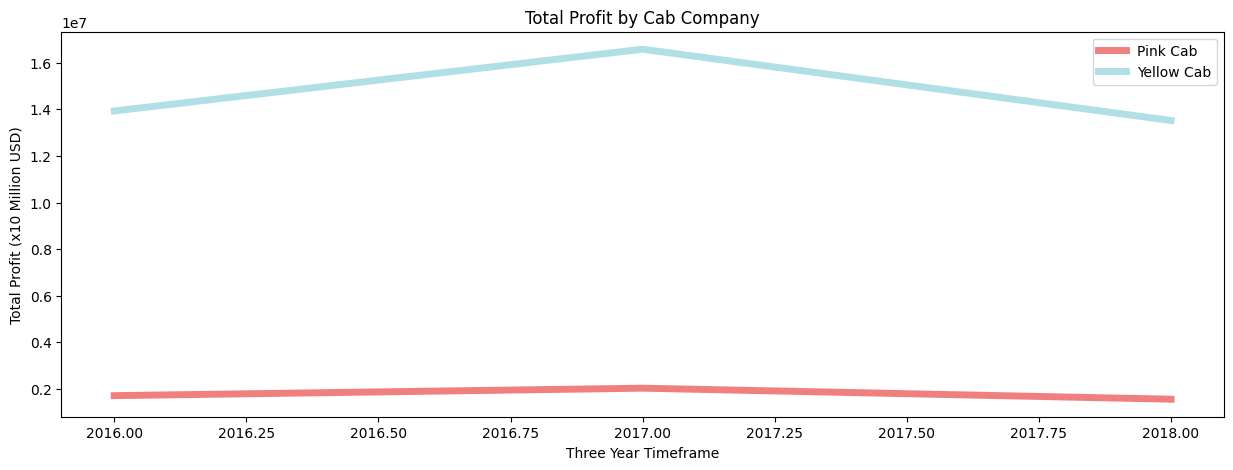

In [368]:
pink_year_sum = pink_cmp.groupby(pink_cmp['Date of Travel'].dt.year)['profit'].sum()
yellow_year_sum = yellow_cmp.groupby(yellow_cmp['Date of Travel'].dt.year)['profit'].sum()


plt.subplots(1,1, figsize= (15,5))
pink_year_sum.plot(color = "lightcoral", lw = 5)
yellow_year_sum.plot(color = "powderblue", lw = 5)
plt.legend(['Pink Cab','Yellow Cab'])
plt.xlabel('Three Year Timeframe')
plt.ylabel('Total Profit (x10 Million USD)')
plt.title('Total Profit by Cab Company')

**Hypothesis 6 Accepted**